# Sklearn experiments

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import scipy
import sklearn
import sklearn.decomposition
import sklearn.manifold
import sklearn.cluster

In [2]:
dRatings = pd.read_csv("data/data.txt", sep="\t", header=None,
                   names=["user", "movie", "rating"])
spRatings = scipy.sparse.csr_matrix(
    (dRatings["rating"], (dRatings["user"]-1, dRatings["movie"]-1))
)

movies_raw = pd.read_csv("data/movies.txt", sep="\t", header=None, index_col=0,
                     names=["movie","title","unknown","action","adventure","animation",
                            "childrens", "comedy","crime","documentary","drama",
                            "fantasy", "filmnoir", "horror","musical","mystery",
                            "romance","scifi","thriller","war","western"]
                    ).sort_index()

dMovies = movies_raw.loc[:,["title"]]
dGenres = movies_raw.iloc[:,1:]

## SVD

In [3]:
# give us plenty of factors to work with
svd = sklearn.decomposition.TruncatedSVD(n_components=50)
svd.fit(spRatings)

TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0)

## TSNE on SVD components

In [4]:
tsneFactors = sklearn.manifold.TSNE(n_components=2).fit_transform(svd.components_.T)
print(tsneFactors.shape)

(1682, 2)


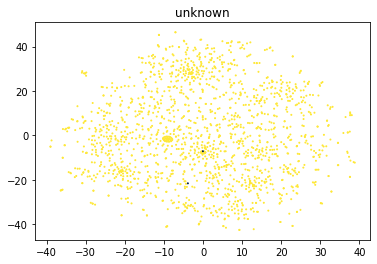

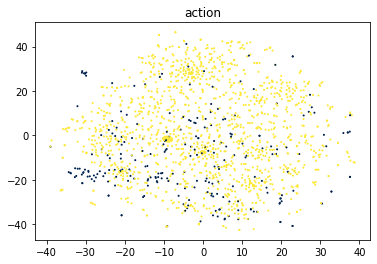

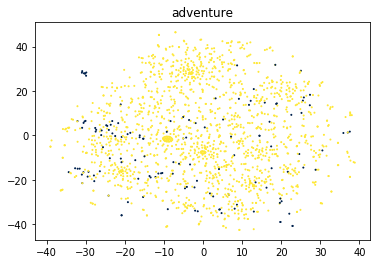

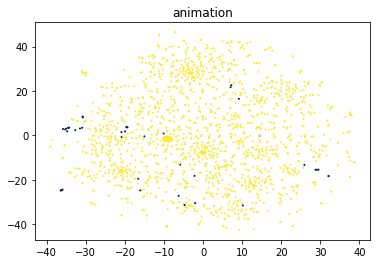

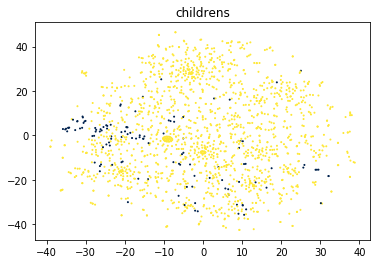

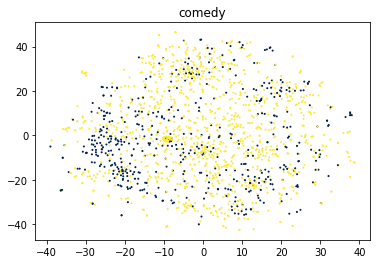

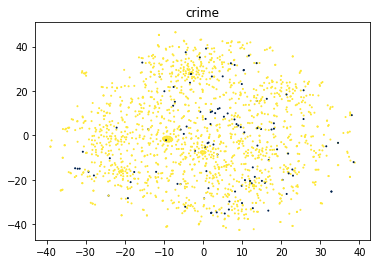

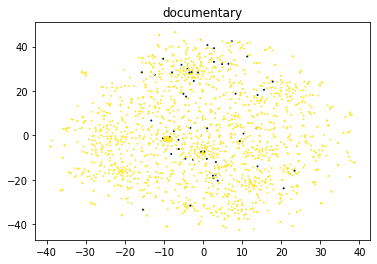

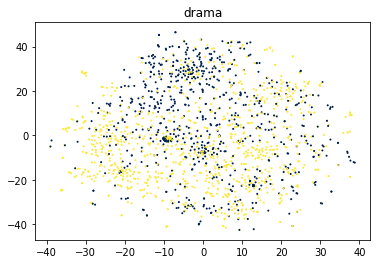

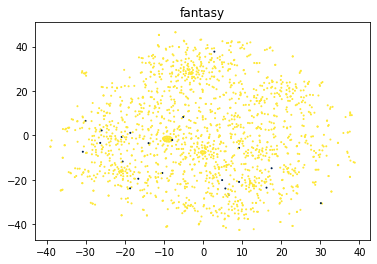

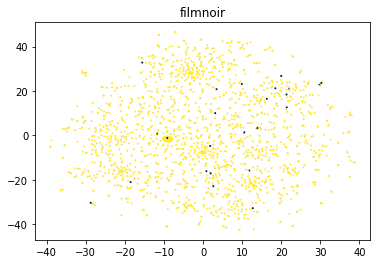

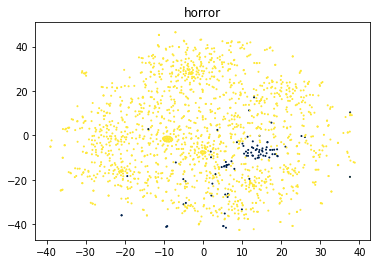

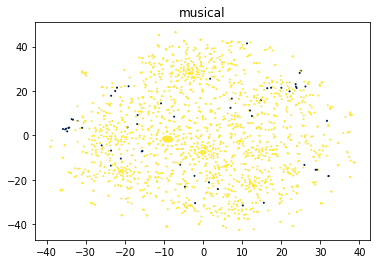

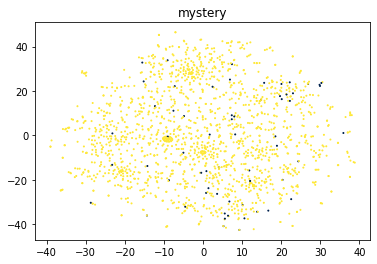

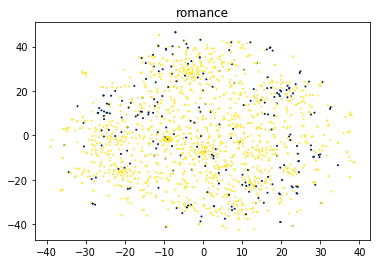

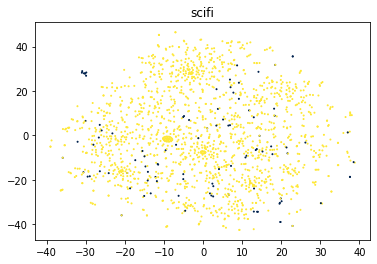

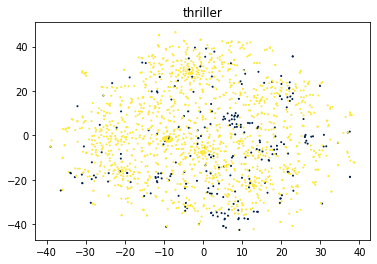

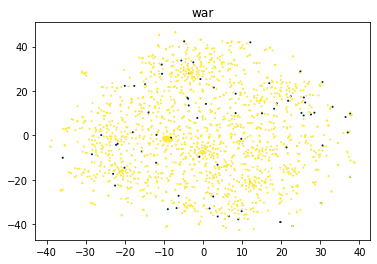

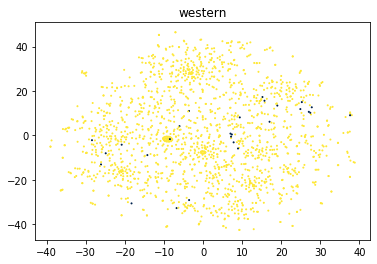

In [5]:
for i in range(19):
    plt.figure()
    plt.title(dGenres.columns[i])
    plt.scatter(tsneFactors[:,0], tsneFactors[:,1], s=1, c=-dGenres.iloc[:,i].values, cmap="cividis")

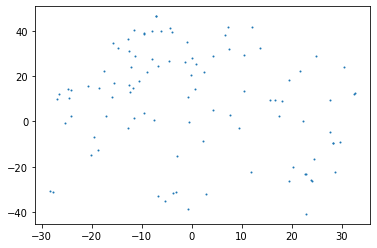

In [6]:
genres = ["drama", "romance"]
movies = dGenres[genres].sum(axis=1) == len(genres)
plt.scatter(tsneFactors[movies,0], tsneFactors[movies,1], s=1)